In [1]:

import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [396]:
data = pd.read_csv("real5foldercsv.csv")
x_data = data['pixels']
y_data = data['emotion']

In [397]:
x_list = []


In [398]:
for i in x_data:
    x_temp = i.split(" ")
    x_temp = np.array(x_temp[:-1],np.float32)
    x_list.append(x_temp)

In [399]:
x_list_array = np.array(x_list)

In [187]:
count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0
count_7 = 0

In [188]:
for i in y_train:
    if i == 0:
        count_0 += 1
    elif i == 1:
        count_1 += 1
    elif i == 2:
        count_2 += 1
    elif i == 3:
        count_3 += 1
    elif i == 4:
        count_4 += 1
    elif i == 5:
        count_5 += 1
    elif i == 6:
        count_6 += 1
    elif i == 7:
        count_7 += 1
        

In [189]:
print("0 > ",count_0)
print("1 > ",count_1)
print("2 > ",count_2)
print("3 > ",count_3)
print("4 > ",count_4)
print("5 > ",count_5)
print("6 > ",count_6)
print("7 > ",count_7)


0 >  1112
1 >  163
2 >  190
3 >  1900
4 >  2449
5 >  2250
6 >  2356
7 >  1340


In [400]:
X_train = x_list_array[0:47049]
X_test = x_list_array[47040:]

(7999, 2304)

In [401]:
y_train = y_data[0:47049]
y_test = y_data[47040:]

In [402]:
X_train_eff = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test_eff = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [403]:
y_train= np_utils.to_categorical(y_train, num_classes=8)
y_test = np_utils.to_categorical(y_test, num_classes=8)


In [404]:
print("X_train data type is", X_train.dtype)
print("y_train data type is", y_train.dtype)
print("X_test data type is", X_test.dtype)
print("y_test data type is", y_test.dtype)

X_train data type is float32
y_train data type is float32
X_test data type is float32
y_test data type is float32


In [405]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (47049, 2304)
X_test shape: (11760, 2304)
y_train shape: (47049, 8)
y_test shape: (11760, 8)


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (10000, 48, 48)

In [21]:
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from tensorflow.keras.optimizers import Adam,SGD

from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [50]:

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam,SGD
import cv2

In [103]:
X_train[0][0]

array([[ 34.],
       [ 18.],
       [ 20.],
       [  9.],
       [  9.],
       [ 15.],
       [ 19.],
       [ 10.],
       [ 15.],
       [  9.],
       [ 12.],
       [  6.],
       [ 13.],
       [ 15.],
       [ 12.],
       [ 11.],
       [ 11.],
       [  9.],
       [ 24.],
       [ 55.],
       [ 72.],
       [101.],
       [108.],
       [114.],
       [138.],
       [143.],
       [137.],
       [129.],
       [111.],
       [106.],
       [117.],
       [118.],
       [ 81.],
       [ 47.],
       [ 39.],
       [ 27.],
       [ 23.],
       [ 26.],
       [ 20.],
       [ 19.],
       [ 20.],
       [ 22.],
       [ 21.],
       [ 17.],
       [ 17.],
       [ 15.],
       [ 13.],
       [ 14.]], dtype=float32)

In [193]:
model = keras.Sequential([
    Input(X_train.shape[1]),
    Dense(256, activation = 'leaky_relu'),
    BatchNormalization(axis = 1),
    Dense(128, activation = 'relu'),
    BatchNormalization(axis = 1),
    Dense(8, activation = 'softmax')
])
 
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 256)               590080    
                                                                 
 batch_normalization_37 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_50 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_38 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_51 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 625,544
Trainable params: 624,776
Non-t

In [195]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
adel = keras.optimizers.Adadelta()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [196]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
368/368 [==============================] - 5s 12ms/step - loss: 1.7399 - accuracy: 0.3961 - val_loss: 2.0569 - val_accuracy: 0.3217
Epoch 2/10
368/368 [==============================] - 4s 11ms/step - loss: 1.4072 - accuracy: 0.5077 - val_loss: 1.8258 - val_accuracy: 0.3972
Epoch 3/10
368/368 [==============================] - 4s 11ms/step - loss: 1.2711 - accuracy: 0.5526 - val_loss: 1.7388 - val_accuracy: 0.4091
Epoch 4/10
368/368 [==============================] - 4s 11ms/step - loss: 1.1795 - accuracy: 0.5867 - val_loss: 1.5801 - val_accuracy: 0.4427
Epoch 5/10
368/368 [==============================] - 4s 12ms/step - loss: 1.0978 - accuracy: 0.6163 - val_loss: 1.7407 - val_accuracy: 0.3958
Epoch 6/10
368/368 [==============================] - 4s 12ms/step - loss: 1.0292 - accuracy: 0.6406 - val_loss: 1.8794 - val_accuracy: 0.3793
Epoch 7/10
368/368 [==============================] - 4s 12ms/step - loss: 0.9719 - accuracy: 0.6598 - val_loss: 1.8078 - val_accuracy: 0.3846

In [197]:
print("Accuracy of our model on validation data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

368/368 [==============================] - 1s 4ms/step - loss: 1.6575 - accuracy: 0.4785
Accuracy of our model on validation data :  47.84863889217377 %


In [201]:
predictions = model.predict(X_test)
y_pred = []

for p in predictions:
    y_pred.append(np.argmax(p))
y_pred[:10]

[5, 7, 4, 6, 0, 0, 3, 6, 4, 6]

In [202]:
y_actual = []

for a in y_test:
    y_actual.append(np.argmax(a))
y_actual[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [203]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.13      0.21      1112
           1       0.12      0.10      0.11       163
           2       0.03      0.05      0.04       190
           3       0.32      0.29      0.31      1900
           4       0.56      0.85      0.68      2449
           5       0.54      0.59      0.57      2250
           6       0.42      0.43      0.42      2356
           7       0.61      0.36      0.45      1340

    accuracy                           0.48     11760
   macro avg       0.39      0.35      0.35     11760
weighted avg       0.47      0.48      0.46     11760



In [22]:
model = FER_Model()
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0     

c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
from keras.callbacks import ModelCheckpoint
filepath="weights_min_loss.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [208]:
from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0
from efficientnet.keras import center_crop_and_resize, preprocess_input

In [210]:
from efficientnet.tfkeras import EfficientNetB0
from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [406]:
base_model = tf.keras.applications.EfficientNetB0(input_shape=(48,48,3),include_top=False,weights="imagenet")

In [407]:
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [408]:
model=Sequential()
model.add(base_model)

model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(Dropout(0.5))
model.add(Dense(128,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(8,activation='softmax'))

In [409]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 2, 2, 1280)       4049571   
                                                                 
 dropout_13 (Dropout)        (None, 2, 2, 1280)        0         
                                                                 
 flatten_10 (Flatten)        (None, 5120)              0         
                                                                 
 batch_normalization_50 (Bat  (None, 5120)             20480     
 chNormalization)                                                
                                                                 
 dense_63 (Dense)            (None, 256)               1310976   
                                                                 
 batch_normalization_51 (Bat  (None, 256)              1024      
 chNormalization)                                    

In [410]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [411]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [412]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [413]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [414]:
tf.config.experimental_run_functions_eagerly(True)

In [418]:
X_train_eff.shape

(47049, 48, 48, 1)

In [419]:
X_test_eff.shape

(11760, 48, 48, 1)

In [420]:
history=model.fit(X_train_eff,y_train,validation_data=(X_test_eff,y_test),epochs = 10,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/10


UnknownError: InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run GatherV2: Dst tensor is not initialized. [Op:GatherV2]
Traceback (most recent call last):

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    return func(device, token, args)

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\tensorflow\python\ops\script_ops.py", line 147, in __call__
    outputs = self._call(device, args)

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\tensorflow\python\ops\script_ops.py", line 154, in _call
    ret = self._func(*args)

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\tensorflow\python\data\ops\structured_function.py", line 220, in py_function_wrapper
    ret = self._func(*nested_args)

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\keras\engine\data_adapter.py", line 358, in grab_batch
    return tf.nest.map_structure(lambda d: tf.gather(d, i, axis=0), data)

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\tensorflow\python\util\nest.py", line 914, in map_structure
    structure[0], [func(*x) for x in entries],

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\tensorflow\python\util\nest.py", line 914, in <listcomp>
    structure[0], [func(*x) for x in entries],

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\keras\engine\data_adapter.py", line 358, in <lambda>
    return tf.nest.map_structure(lambda d: tf.gather(d, i, axis=0), data)

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 153, in error_handler
    raise e.with_traceback(filtered_tb) from None

  File "c:\Users\ANFIELD\miniconda3\envs\tf_new\lib\site-packages\tensorflow\python\framework\ops.py", line 7186, in raise_from_not_ok_status
    raise core._status_to_exception(e) from None  # pylint: disable=protected-access

tensorflow.python.framework.errors_impl.InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run GatherV2: Dst tensor is not initialized. [Op:GatherV2]


	 [[{{node EagerPyFunc}}]] [Op:IteratorGetNext]

In [237]:
from skimage.io import imread

In [347]:
list_pixel = []
image = cv2.imread(r'C:\Users\ANFIELD\Desktop\tu\cn240\ann\testpuredata\Charles_Moose_0002.jpg')

image = cv2.resize(image,(48,48))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
for y in range(48):
    for x in range(48):
        list_pixel.append(gray[x][y])



In [348]:
test_data =[]
test_data.append(list_pixel)

In [349]:
x.shape

AttributeError: 'int' object has no attribute 'shape'

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

In [277]:
history.model

In [368]:
print("Accuracy of our model on validation data : " , model.evaluate(X_test_eff,y_test)[1]*100 , "%")

368/368 [==============================] - 48s 131ms/step - loss: 1.1403 - accuracy: 0.9127 - precision: 0.7025 - recall: 0.5227 - auc: 0.9143 - f1_score: 0.5802
Accuracy of our model on validation data :  91.26700758934021 %


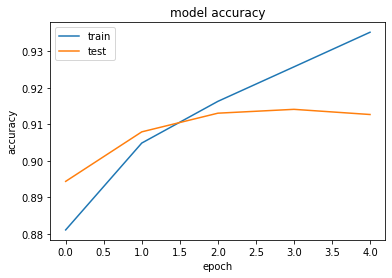

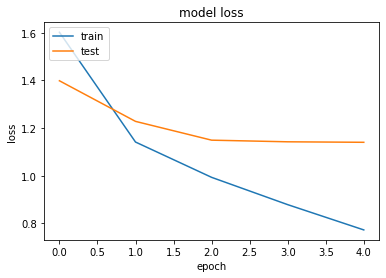

In [369]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [249]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")



(48, 48)

In [370]:
tf.data.experimental.enable_debug_mode()

In [371]:
test_data = np.array(test_data)

Prediction probability array is:
0 : 0.21326566
1 : 0.0033268721
2 : 0.0012361738
3 : 0.106043085
4 : 0.010869525
5 : 0.038474154
6 : 0.61604077
7 : 0.0107438285
From which the max choice is: 6


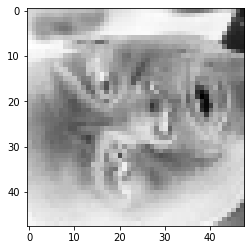

In [374]:
plt.imshow(test_data.reshape(48, 48),cmap='Greys')
pred = model.predict(test_data.reshape(1, 48, 48, 1))
print("Prediction probability array is:")

count = 0

for i in pred.squeeze():
    print(count, ":", i)
    count += 1

print("From which the max choice is:", pred.argmax())


In [375]:
data_puretest = pd.read_csv("real5foldercsv.csv").head(35280)

In [376]:
x_data_puretest = data_puretest['pixels']
y_data_puretest = data_puretest['emotion']

In [377]:
x_data_puretest_test = x_data_puretest[23521:35280]



In [378]:
y_data_puretest_test = y_data_puretest[23521:35280]

In [379]:
x_puretest =[]

In [380]:
for i in x_data_puretest_test:
    x_temp = i.split(" ")
    x_temp = np.array(x_temp[:-1],np.float32)
    x_puretest.append(x_temp)

In [381]:
x_puretest_array = np.array(x_puretest)

In [382]:
x_puretest_array.shape

(11759, 2304)

In [383]:
X_puretest_eff = x_puretest_array.reshape(x_puretest_array.shape[0], 48, 48, 1)

In [384]:
X_puretest_eff.shape

(11759, 48, 48, 1)

In [385]:
y_puretest_eff = np_utils.to_categorical(y_data_puretest_test, num_classes=8)

In [390]:
pred = model.predict(X_test_eff)

In [391]:
y_actual = []

for a in y_test:
    y_actual.append(np.argmax(a))
y_actual[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [393]:
y_pred = []

for p in pred:
    y_pred.append(np.argmax(p))
y_pred[:10]

[6, 3, 6, 0, 6, 3, 3, 6, 7, 0]

Text(69.0, 0.5, 'Truth')

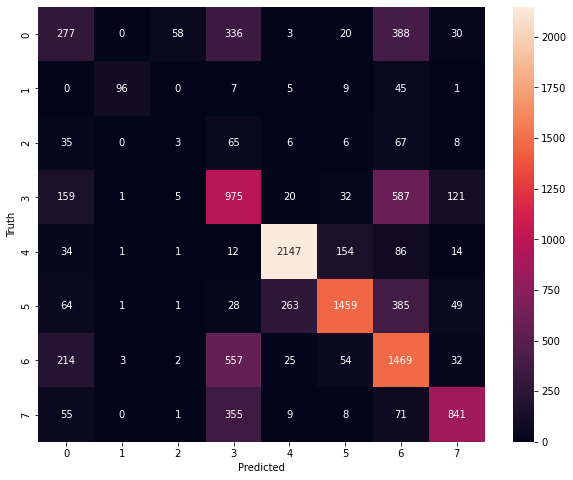

In [394]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_pred)

plt.figure(figsize = (10, 8))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [395]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.25      0.28      1112
           1       0.94      0.59      0.72       163
           2       0.04      0.02      0.02       190
           3       0.42      0.51      0.46      1900
           4       0.87      0.88      0.87      2449
           5       0.84      0.65      0.73      2250
           6       0.47      0.62      0.54      2356
           7       0.77      0.63      0.69      1340

    accuracy                           0.62     11760
   macro avg       0.58      0.52      0.54     11760
weighted avg       0.64      0.62      0.62     11760

